# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from sklearn import datasets
# Import API key
from api_keys import weather_api_key
# ignoring warning
import warnings
warnings.filterwarnings('ignore')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:

count_one = 1
set_one = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


all_data = []

print('Beginning Data Retrieval \n-----------------------------------') 

for c in cities:

   # Build query URL

     query_url = f"{url}appid={weather_api_key}&units={units}&q=" + cities[1]   

    
     try:
       print(f'Processing Record {count_one} of Set {set_one} | {city}')
       query_url = f"{url}appid={weather_api_key}&units={units}&q=" + c    
       response = requests.get(query_url).json()
       city = c
       lat = response["coord"]['lat']
       lon = response["coord"]['lon']
       temp_max = response["main"]['temp_max']
       Humidity = response["main"]['humidity']
       Cloudiness = response["clouds"]['all']
       Wind_Speed = response["wind"]['speed']
       Country = response["sys"]['country']
       Date = response["dt"]
       #print(city, lat, lon, temp, Humidity, Cloudiness,Wind_Speed,Country, Date)
       all_data.append({"City":city, "Lat": lat, "Lng": lon, "Max Temp": temp_max, "Humidity":Humidity,\
                        "Cloudiness":Cloudiness , "Wind Speed": Wind_Speed ,"Country": Country, "Date": Date})
       count_one += 1

     except:
        print("City not found. Skipping...")
        
     if count_one == 50:
        set_one += 1
        count_one = 1
        time.sleep(10)
print('-----------------------------------\nData Retrival Complete\n-----------------------------------') 
 
#all_data    
#final_data = pd.DataFrame(all_data) 
#final_data

Beginning Data Retrieval 
-----------------------------------
Processing Record 1 of Set 1 | kathu
Processing Record 2 of Set 1 | kyra
Processing Record 3 of Set 1 | faranah
Processing Record 4 of Set 1 | egvekinot
City not found. Skipping...
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | belushya guba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | kimbe
Processing Record 11 of Set 1 | ati
City not found. Skipping...
Processing Record 11 of Set 1 | fevralsk
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | kukuna
Processing Record 18 of Set 1 | castro
Process

Processing Record 31 of Set 4 | bessemer
Processing Record 32 of Set 4 | bilma
Processing Record 33 of Set 4 | paita
Processing Record 34 of Set 4 | palmer
Processing Record 35 of Set 4 | sao filipe
Processing Record 36 of Set 4 | williston
City not found. Skipping...
Processing Record 36 of Set 4 | nizhneyansk
Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | mumbwa
Processing Record 40 of Set 4 | saint anthony
City not found. Skipping...
Processing Record 40 of Set 4 | amderma
Processing Record 41 of Set 4 | khadyzhensk
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | telenesti
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | ahuimanu
Processing Record 47 of Set 4 | marathon
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | porto novo
Processing Record 1 of Set 5 | chimore
Processing Record 2 of Set 5 | s

City not found. Skipping...
Processing Record 3 of Set 8 | sigerfjord
Processing Record 4 of Set 8 | vardo
Processing Record 5 of Set 8 | sal rei
Processing Record 6 of Set 8 | alofi
Processing Record 7 of Set 8 | khani
Processing Record 8 of Set 8 | minnedosa
Processing Record 9 of Set 8 | bol
Processing Record 10 of Set 8 | nargana
Processing Record 11 of Set 8 | mattru
Processing Record 12 of Set 8 | tonstad
Processing Record 13 of Set 8 | teya
Processing Record 14 of Set 8 | nouadhibou
Processing Record 15 of Set 8 | saldanha
Processing Record 16 of Set 8 | tanabe
Processing Record 17 of Set 8 | sulecin
City not found. Skipping...
Processing Record 17 of Set 8 | sentyabrskiy
Processing Record 18 of Set 8 | saint-augustin
Processing Record 19 of Set 8 | caconda
Processing Record 20 of Set 8 | lagoa
Processing Record 21 of Set 8 | tessalit
Processing Record 22 of Set 8 | durres
Processing Record 23 of Set 8 | deloraine
Processing Record 24 of Set 8 | makakilo city
Processing Record 2

City not found. Skipping...
Processing Record 28 of Set 11 | dera din panah
Processing Record 29 of Set 11 | nueva loja
City not found. Skipping...
Processing Record 29 of Set 11 | phnum penh
Processing Record 30 of Set 11 | comodoro rivadavia
City not found. Skipping...
Processing Record 30 of Set 11 | rungata
Processing Record 31 of Set 11 | moerai
Processing Record 32 of Set 11 | akdepe
Processing Record 33 of Set 11 | tura
Processing Record 34 of Set 11 | sabang
Processing Record 35 of Set 11 | pachino
Processing Record 36 of Set 11 | port antonio
Processing Record 37 of Set 11 | cairns
Processing Record 38 of Set 11 | sangar
Processing Record 39 of Set 11 | talnakh
Processing Record 40 of Set 11 | beaufort
City not found. Skipping...
Processing Record 40 of Set 11 | ciras
Processing Record 41 of Set 11 | deputatskiy
City not found. Skipping...
Processing Record 41 of Set 11 | marcona
Processing Record 42 of Set 11 | sheopur
Processing Record 43 of Set 11 | rudnichnyy
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#all_data    
final_data = pd.DataFrame(all_data) 
#Save DataFrame 
final_data.to_csv("output_data/cities.csv")
final_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kyra,49.5776,111.9753,17.69,52,9,11.45,RU,1634314471
1,faranah,10.0404,-10.7434,86.47,62,67,3.18,GN,1634314471
2,egvekinot,66.3167,-179.1667,11.97,77,28,7.23,RU,1634314472
3,jamestown,42.0970,-79.2353,74.52,88,90,4.61,US,1634314400
4,kodiak,57.7900,-152.4072,33.31,80,20,6.91,US,1634314473


In [33]:
final_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.387765,18.123125,62.880353,67.225750,54.686067,8.467407,1.634315e+09
std,33.388296,88.697823,22.059323,23.191517,38.938025,6.242985,1.308201e+02
min,-54.800000,-179.166700,-6.470000,1.000000,0.000000,0.000000,1.634314e+09
25%,-5.454200,-60.605300,48.270000,55.000000,16.500000,3.785000,1.634315e+09
50%,24.468600,20.116700,67.410000,72.000000,62.000000,7.000000,1.634315e+09
75%,47.990150,95.715700,79.620000,84.000000,95.000000,11.500000,1.634315e+09
max,78.218600,178.416700,104.670000,100.000000,100.000000,43.730000,1.634315e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#I skip this step because there are no cities that have humidity > 100%.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [34]:
#  Get the indices of cities that have humidity over 100%.
final_data[final_data['Humidity'].gt(100)].index

Int64Index([], dtype='int64')

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

final_data_df = final_data['Humidity']
quartiles = final_data_df.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
humidity_min = final_data['Humidity'].min()
humidity_max = final_data['Humidity'].max()

# print(f"The lower quartile of Humidity is: {lowerq}")
# print(f"The upper quartile of Humidity is: {upperq}")
# print(f"The interquartile range of Humidity is: {iqr}")
# print(f"The the median of Humidity is: {quartiles[0.5]} ")
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
# print(f"The min quartile of humidity is: {humidity_min}")
# print(f"The max quartile of humidity is: {humidity_max}")

print(f"Potential humidity outlier is {humidity_min}")
clean_city_data= final_data.drop(final_data.loc[final_data['Humidity']== {humidity_min}].index, inplace = False)

clean_city_data.head()                              

Potential humidity outlier is 1


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kyra,49.5776,111.9753,17.69,52,9,11.45,RU,1634314471
1,faranah,10.0404,-10.7434,86.47,62,67,3.18,GN,1634314471
2,egvekinot,66.3167,-179.1667,11.97,77,28,7.23,RU,1634314472
3,jamestown,42.0970,-79.2353,74.52,88,90,4.61,US,1634314400
4,kodiak,57.7900,-152.4072,33.31,80,20,6.91,US,1634314473


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

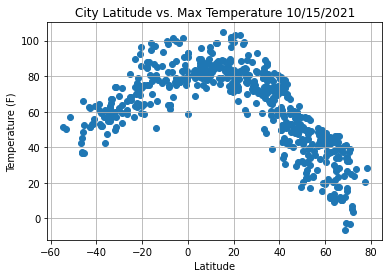

In [38]:
#plot scatter plot
plt.scatter(final_data['Lat'],final_data['Max Temp'], marker='o')
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the plotted figure
plt.savefig("output_data/fig1.png")

plt.show()

    

## Latitude vs. Humidity Plot

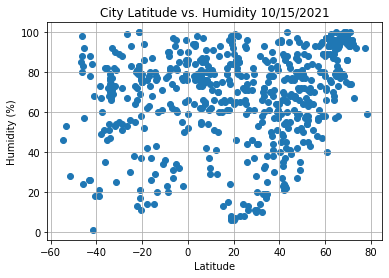

In [39]:
#plot scatter plot
plt.scatter(final_data['Lat'],final_data['Humidity'], marker='o')
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the plotted figure
plt.savefig("output_data/fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

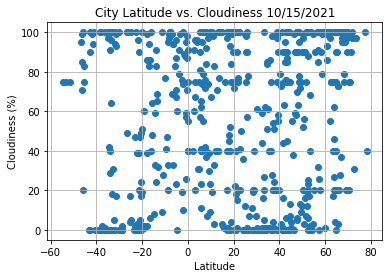

In [40]:
#plot scatter plot
plt.scatter(final_data['Lat'],final_data['Cloudiness'], marker='o')
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the plotted figure
plt.savefig("output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

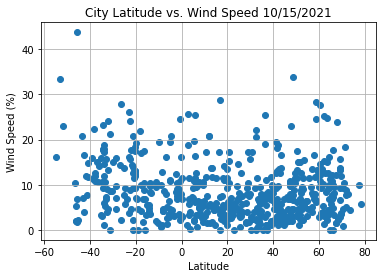

In [41]:
#plot scatter plot
plt.scatter(final_data['Lat'],final_data['Wind Speed'], marker='o')
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the plotted figure
plt.savefig("output_data/fig4.png")

plt.show()

## Linear Regression

In [42]:
southern= final_data.loc[final_data['Lat'] < 0]

southern['Hemisphere'] = 'Southern Hemisphere'
Southern_Hemisphere=southern.set_index('Hemisphere')
#Southern_Hemisphere

northern = final_data.loc[final_data['Lat'] >= 0]
northern['Hemisphere'] = 'Northern Hemisphere'
Northern_Hemisphere=northern.set_index('Hemisphere')
Northern_Hemisphere



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Hemisphere,,,,,,,,,
Northern Hemisphere,kyra,49.5776,111.9753,17.69,52,9,11.45,RU,1634314471
Northern Hemisphere,faranah,10.0404,-10.7434,86.47,62,67,3.18,GN,1634314471
Northern Hemisphere,egvekinot,66.3167,-179.1667,11.97,77,28,7.23,RU,1634314472
Northern Hemisphere,jamestown,42.0970,-79.2353,74.52,88,90,4.61,US,1634314400
Northern Hemisphere,kodiak,57.7900,-152.4072,33.31,80,20,6.91,US,1634314473
...,...,...,...,...,...,...,...,...,...
Northern Hemisphere,orikhiv,47.5673,35.7858,54.23,42,100,7.27,UA,1634314853
Northern Hemisphere,palimbang,6.2106,124.1894,78.96,85,95,3.38,PH,1634314853
Northern Hemisphere,navahrudak,53.6000,25.8333,48.96,76,100,15.43,BY,1634314853


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7438694585632021


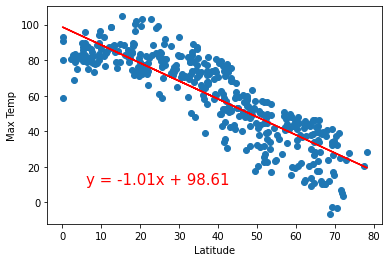

In [43]:
# calculating linear regression values and scatter plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5697353552777525


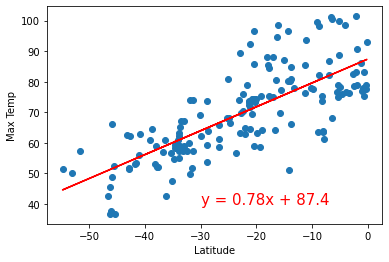

In [44]:
# calculating linear regression values and scatter plot. 
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0498620005661797


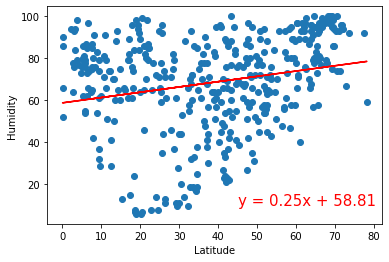

In [45]:
# calculating linear regression values and scatter plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009397520459929906


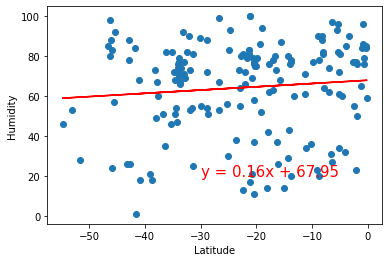

In [46]:
# calculating linear regression values and scatter plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021421319659404265


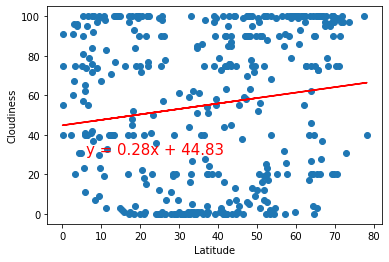

In [47]:
# calculating linear regression values and scatter plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004756264898700742


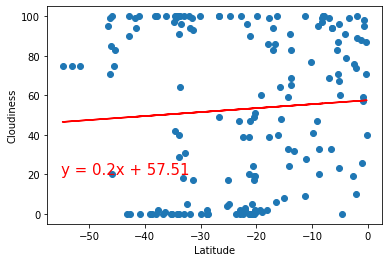

In [48]:
# calculating linear regression values and scatter plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006789790988825426


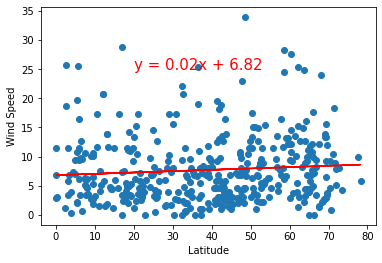

In [49]:
# calculating linear regression values and scatter plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07478586176254248


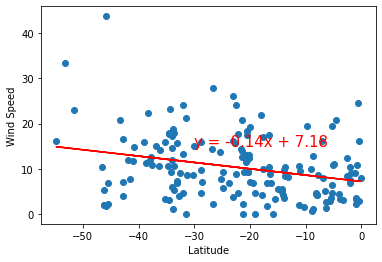

In [50]:
# calculating linear regression values and scatter plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()